In [81]:
import json
import os
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [18]:
#reading the csv output files of each model
#please provide the proper paths
marco_s_csv = pd.read_csv('/content/camtrapbench/csv/marco_sub.csv')
evolving_p2_csv = pd.read_csv('/content/camtrapbench/csv/evloving_ai_phase-2.csv', header=None)

In [19]:
#custom_csv = pd.read_csv('path_to_custom_csv')
ground_truth_csv = pd.read_csv('/content/camtrapbench/class_labels.csv') #only if ground truths are present

In [110]:
#Loads the json file containing the class label mapper
path_to_json = 'output_species_labels.json'

with open(path_to_json, 'r') as file:
    label_json = json.load(file)


In [14]:
#get the names of all images used
#this is used to standardise output lists for all the models
folder_path ='/content/camtrapbench/dataset' #path to folders containing images
img_names_list = []
for file_name in os.listdir(folder_path):
    img_names_list.append(file_name)

In [111]:
#for custom model conversion

def custom_conversion(img_name):
  val = 0
  #label_json contains the dictonary to map your output with corresponding label
  '''
  /*
  code here
  */
  '''
  return val

In [99]:
# function to convert output to the format provided in the output_species_labels.json file
#the output should be provided to the given input image name

#for marco_sub conversion.
def marco_s_conversion(img_name):
  val = 0
  for index,value in enumerate(marco_s_csv['file_name']):
    if value == img_name:
      val = label_json[marco_s_csv['predicted_class'][index].lower()]
  return val

#for evolving phase - 2 conversion.
def evolving_p2_conversion(img_name):
  #the output_species_label.json is created first with evolving p2, so the values can be directly taken
  val = 0
  for index,value in enumerate(evolving_p2_csv[1]):
    if img_name in value:
      val = int(evolving_p2_csv[10][index][1:])
  return val


#for ground truth value conversion
#please convert the code to match your ground truths file
def ground_truth_conversion(img_name):
  val = 0
  for index,value in enumerate(ground_truth_csv['image']):
    if img_name ==value:
      if ground_truth_csv['category'][index].lower() in label_json.keys():
        val = label_json[ground_truth_csv['category'][index].lower()]
      else:
        val = -404 # setting value to a random number not in list if the category is not present in the list
  return val

In [100]:
marco_s=[]
evolve_p2=[]
custom_model = []
ground_truth_labels= []
for i in img_names_list:
  marco_s.append(marco_s_conversion(i))
  evolve_p2.append(evolving_p2_conversion(i))
  ground_truth_labels.append(ground_truth_conversion(i))
  custom_model.append(custom_conversion(i))

In [101]:
#finds the species name from the presnet list
def find_key_by_value(value):
    for key, val in label_json.items():
        if val == value:
            return key
    return 'Not available'

In [102]:
# function to print the plots
def plot_count(lst,name):
    names_list=[]
    for val in lst:
      names_list.append(find_key_by_value(val))
    counts = Counter(names_list)
    elements = list(counts.keys())
    frequency = list(counts.values())

    plt.bar(elements, frequency)
    plt.xlabel('speices')
    plt.ylabel('count')
    plt.title(name)
    plt.xticks(rotation=90)
    plt.show()

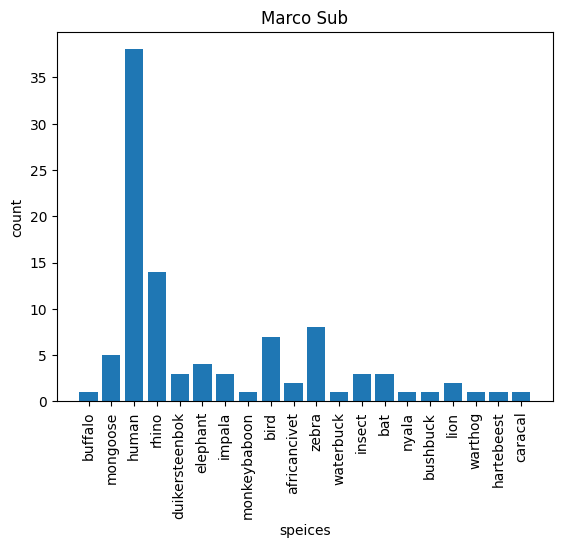

In [103]:
plot_count(marco_s,'Marco Sub')

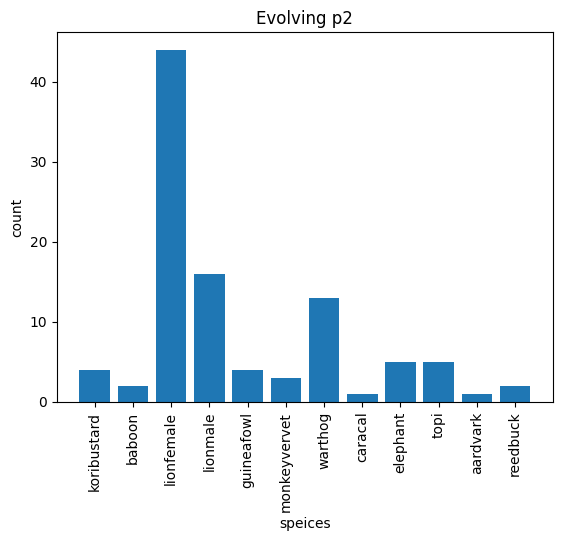

In [104]:
plot_count(evolve_p2,'Evolving p2')

In [98]:
#plot_count(custom_model,'Custom model')

In [105]:
print(f'comparing custom model with evolving p2 ={accuracy_score(custom_model,evolve_p2)}')
print(f'comparing custom model with marco ={accuracy_score(custom_model,marco_s)}')

comparing custom model with evolving p2 =0.0
comparing custom model with marco =0.0


***The confusion matrices and accuracy can only be generated if you have a ground truth label***

In [106]:
#Run it only if you have a ground truth label provided
print(f'evolving accuracy ={accuracy_score(evolve_p2,ground_truth_labels)}')
print(f'marco accuracy ={accuracy_score(marco_s,ground_truth_labels)}')
print(f'custom model accuracy ={accuracy_score(custom_model,ground_truth_labels)}')

evolving accuracy =0.0
marco accuracy =0.11
custom model accuracy =0.3


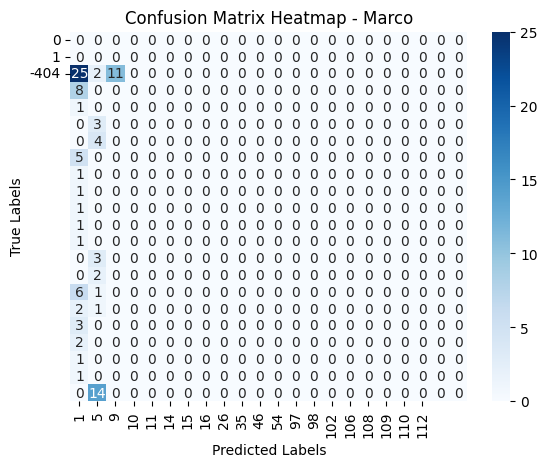

In [107]:
conf_matrix_marco = confusion_matrix(marco_s,ground_truth_labels)

sns.heatmap(conf_matrix_marco, annot=True, cmap='Blues', fmt='d', xticklabels= list(set(marco_s)),yticklabels= list(set(ground_truth_labels)))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Marco')
plt.show()

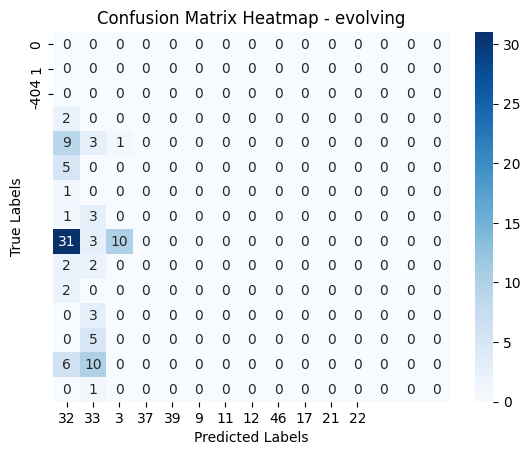

In [108]:
conf_matrix_evolve = confusion_matrix(evolve_p2,ground_truth_labels)

sns.heatmap(conf_matrix_evolve, annot=True, cmap='Blues', fmt='d',xticklabels= list(set(evolve_p2)),yticklabels= list(set(ground_truth_labels)))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - evolving')
plt.show()

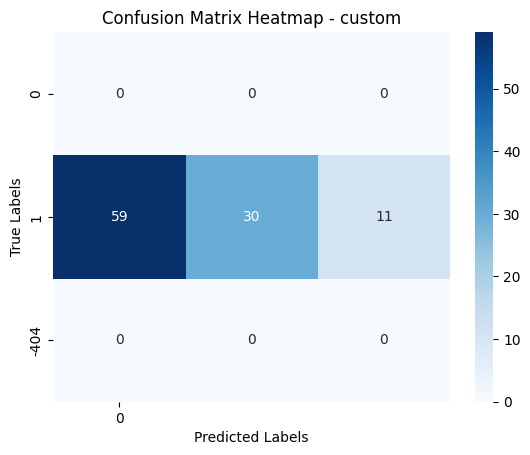

In [109]:
conf_matrix_custom = confusion_matrix(custom_model,ground_truth_labels)

sns.heatmap(conf_matrix_custom, annot=True, cmap='Blues', fmt='d',xticklabels= list(set(custom_model)),yticklabels= list(set(ground_truth_labels)))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - custom')
plt.show()